In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [2]:
#load data
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<Axes: xlabel='Clump', ylabel='UnifSize'>

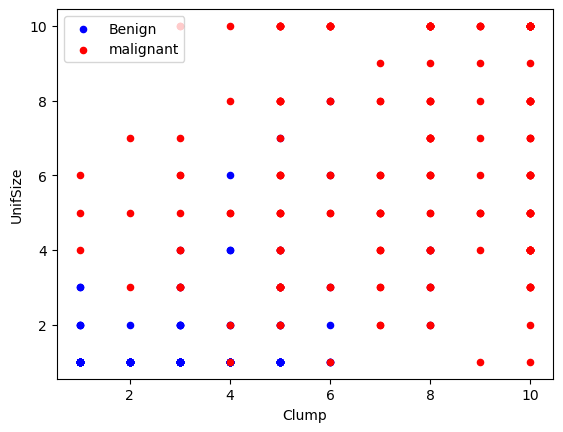

In [6]:
#distribution of classes
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]
#help(benign_df.plot)
axes = benign_df.plot(kind = 'scatter',x = 'Clump',y = 'UnifSize',color = 'blue',label = 'Benign')

malignant_df.plot(kind = 'scatter',x = 'Clump',y = 'UnifSize',color = 'red',label = 'malignant',ax=axes)

In [7]:
#unwanted rows
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [16]:
#remove unwanted columns
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#numpy nd array, independent array
X = np.asarray(feature_df)
#dependent array
y = np.asarray(cell_df['Class'])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [19]:
#train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
X_train.shape
y_train.shape

(559,)

In [25]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma = 'auto', C=2)
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)#1D


In [23]:
#result
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        88
           4       0.98      0.96      0.97        52

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

